# Importing the necessary library and the dataset:

In [1]:
#Importing the Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
#Uplaoding the dataset:
Data=pd.read_csv('ProjectDataset.csv')

#Showing the dataset
Data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \nMay 2013 to May 2017 B.E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \n MCA YMCAUST, Faridabad..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


# Visualizing the Catgories

In [3]:
#Printing the Distint type of categories:
print(Data['Category'].unique())

print("total unique Category: ",format(len(Data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique Category:  25


In [4]:
#Visulazing the categories with the number of examples:
print(Data['Category'].value_counts())

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


In [5]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='count', ylabel='Category'>

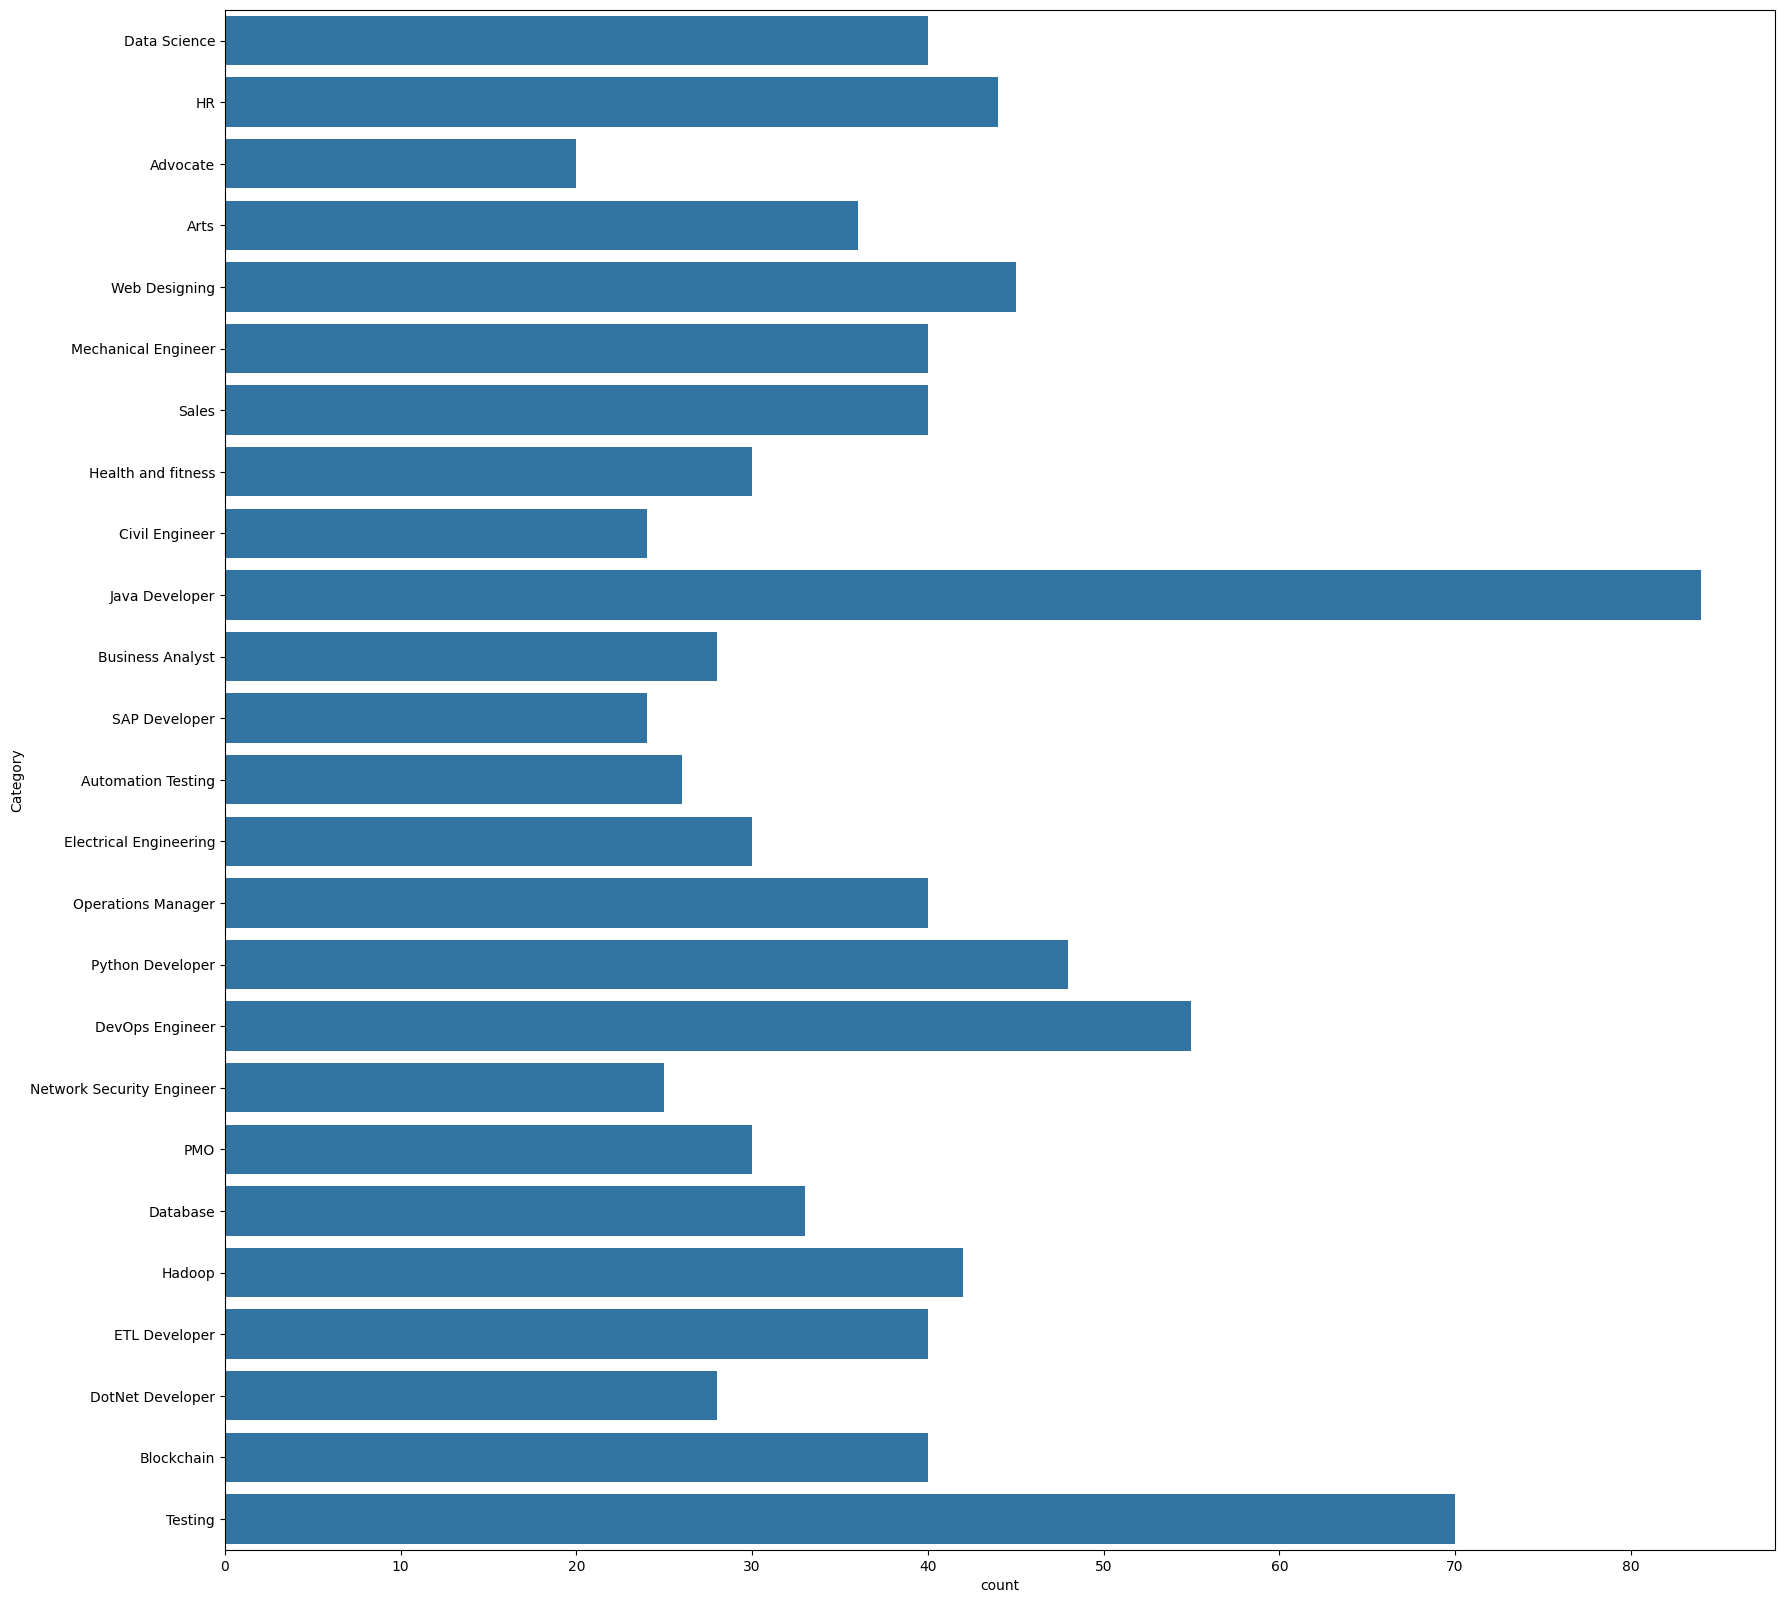

In [6]:
#Importing the seaborn library:
import seaborn as sns

plt.figure(figsize = (20,20))
sns.countplot(y="Category",data=Data)

# Visualizing the distribution of Categories:

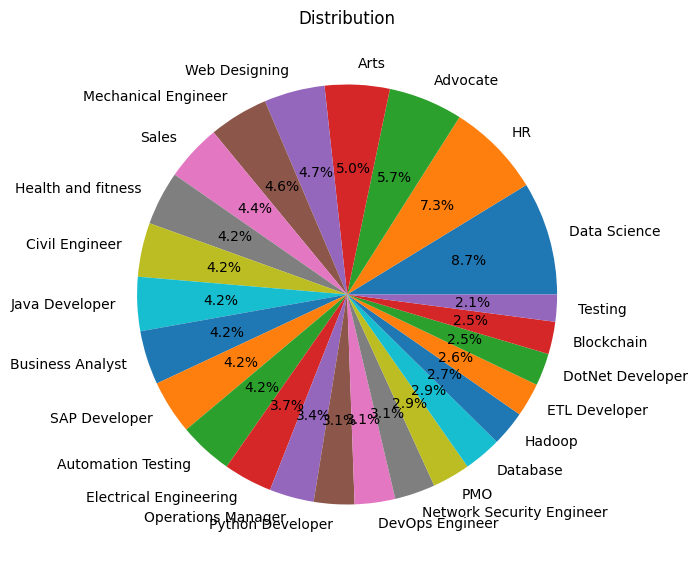

In [7]:
#including necessary libraries:
from matplotlib.gridspec import GridSpec
count = Data['Category'].value_counts()
label = Data['Category'].unique()

plt.figure(1,figsize=(15,15))
grid = GridSpec(2,2)
cmap = plt.get_cmap('coolwarm')

color = [cmap(i) for i in np.linspace(0,1,5)]
plt.subplot(grid[0,1],aspect=1,title='Distribution')

pie=plt.pie(count,labels=label,autopct='%0.1f%%')
plt.show()

# Preprocessing the Dataset:

In [8]:
import re

#Cleaning the data:
def clean(text):
    text=re.sub('http\S+\s*',' ',text)
    text=re.sub('RT|cc',' ',text)
    text=re.sub('#\S+','',text)
    text=re.sub('@\S+','',text)
    text=re.sub('[%s]' % re.escape("""!"#$&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',text)
    text=re.sub('\s+',' ',text)
    text=re.sub(r'[^\x00-\x7f]',r' ',text)
    return text

Data['clean text'] = Data.Resume.apply(lambda x : clean(x))


In [9]:
Data['clean text']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills     R     Python     SAP HANA     Table...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills     Proficient in MS office Wo...
958        Willingness to a ept the challenges     Po...
959    PERSONAL SKILLS     Quick learner     Eagernes...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: clean text, Length: 962, dtype: object

# Ploting Word cloud Images:

In [10]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/komalkalaptop/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/komalkalaptop/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install nltk

zsh:1: command not found: pip


In [13]:
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwords = set(stopwords.words('english')+['``',"''"])

total_words=[]
sentences = Data['Resume'].values
cleanSentences = ""

for i in range(0,200):
    text=clean(sentences[i])
    cleanSentences+=text
    words=nltk.word_tokenize(text)
    for word in words:
        if word not in stopwords and word not in string.punctuation:
            total_words.append(word)

word_freq_dist=nltk.FreqDist(total_words)
most_common=word_freq_dist.most_common(100)

print(most_common)

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

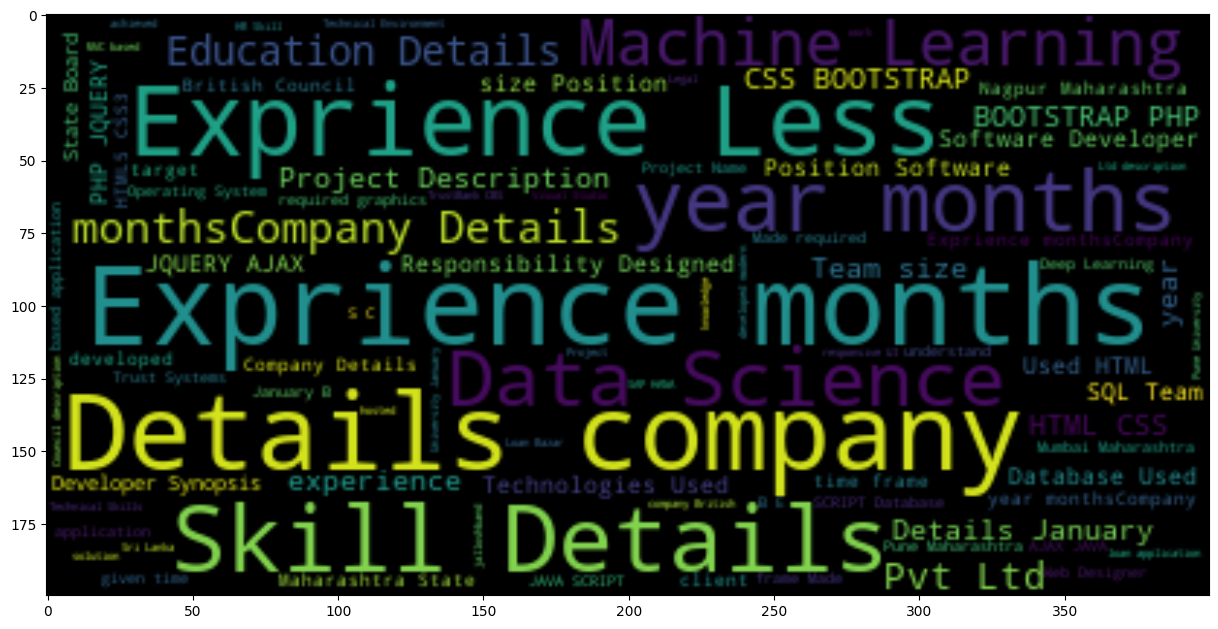

In [14]:
WC = WordCloud().generate(cleanSentences)
plt.figure(figsize=(15,15))
plt.imshow(WC,interpolation='bilinear')

# Training the Machine Learning Model

In [15]:
from sklearn.preprocessing import LabelEncoder

var = ['Category']
le=LabelEncoder()
for i in var:
    Data[i] = le.fit_transform(Data[i])

In [16]:
Data

,Category,Resume,clean text
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \nMay 2013 to May 2017 B.E ...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Table...
4,6,"Education Details \n MCA YMCAUST, Faridabad...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Wo...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Po...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagernes...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

text = Data['clean text'].values
target=Data['Category'].values

vect = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=2000)

vect.fit(text)

Word_feature=vect.transform(text)

In [18]:
Word_feature

<962x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 123286 stored elements in Compressed Sparse Row format>

# Splitting the dataset:

In [19]:
x_train, x_test, y_train, y_test = train_test_split(Word_feature,target,random_state = 0,test_size=0.25)
print(x_train.shape)
print(x_test.shape)

(721, 2000)
(241, 2000)


# KNN:

## Model Training


In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

## Finding Cross Validation:

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Wrap the KNeighborsClassifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(knn_classifier)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [1.         0.94444444 0.9375     0.97222222 0.97222222]
Mean CV score: 0.9652777777777779
Standard deviation of CV scores: 0.02239516041194042


## Confusion Matrix:

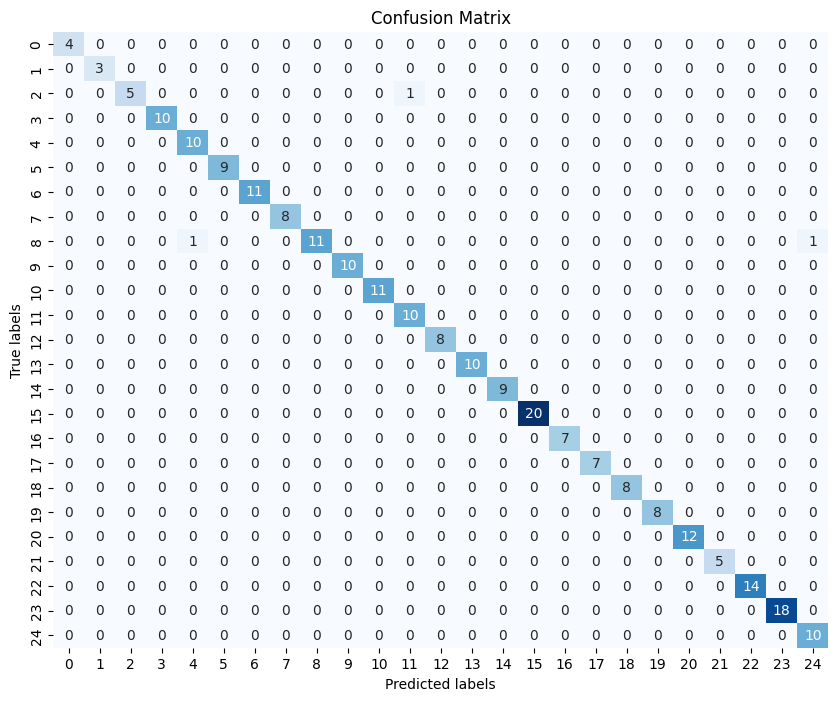

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Wrap the KNeighborsClassifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(knn_classifier)

# Train the model
model.fit(x_train, y_train)

# Predict labels for the test set
y_pred = model.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predicting using the model on the test data:

In [23]:
prediction = model.predict(x_test)

## Obtaining the testing and training score

In [24]:
print("training score : {:.8f}".format(model.score(x_train,y_train)))
print("testing score : {:.8f}".format(model.score(x_test,y_test)))

training score : 0.99583911
testing score : 0.98755187


## Finding the performance measures:

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP) from the confusion matrix
tn = cm[0, 0]
fp = cm[0, 1:].sum()
fn = cm[1:, 0].sum()
tp = cm[1:, 1:].sum()

# Calculate Specificity, G1-measure, and False Positive Rate (FPR)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
g1_measure = 2 * ((precision * recall) / (precision + recall))
fpr = fp / (fp + tn)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Specificity:", specificity)
print("G1-measure:", g1_measure)
print("False Positive Rate (FPR):", fpr)

Accuracy: 0.9875518672199171
Precision: 1.0
Recall: 1.0
F1-score: 0.9873138617951895
Specificity: 1.0
G1-measure: 1.0
False Positive Rate (FPR): 0.0


## Showing performance measures through a graph:

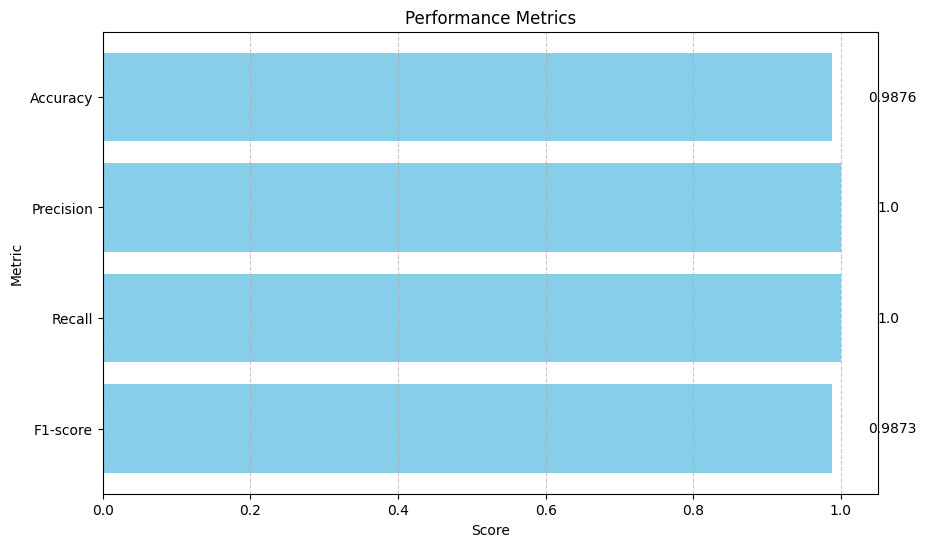

Performance Metrics:
      Metric     Score
0   Accuracy  0.987552
1  Precision  1.000000
2     Recall  1.000000
3   F1-score  0.987314


In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to store performance metrics
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                           'Score': [accuracy, precision, recall, f1]})

# Plot performance metrics as a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(metrics_df['Metric'], metrics_df['Score'], color='skyblue')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_width() * 1.05, bar.get_y() + bar.get_height()/2, round(bar.get_width(), 4), va='center')

plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('Performance Metrics')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()

# Print performance metrics as a table
print("Performance Metrics:")
print(metrics_df)

# Naiv Bayes:


## Training the Model:

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

# Create an instance of the Naive Bayes classifier (Multinomial Naive Bayes is commonly used for text classification)
nb_model = MultinomialNB()

# Wrap the Naive Bayes classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(nb_model)

# Train the model on the training data
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

## Finding the Cross validation scores

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix

# Convert sparse data to dense numpy array
if isinstance(x_train, csr_matrix):
    x_train = x_train.toarray()

# Create an instance of the Naive Bayes classifier
nb_classifier = GaussianNB()

# Wrap the Naive Bayes classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(nb_classifier)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())


Cross-validation scores: [0.97931034 0.97222222 0.97222222 0.97222222 0.95138889]
Mean CV score: 0.9694731800766284
Standard deviation of CV scores: 0.009449688844138665


## Obtaining the confusion matrix



/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/li

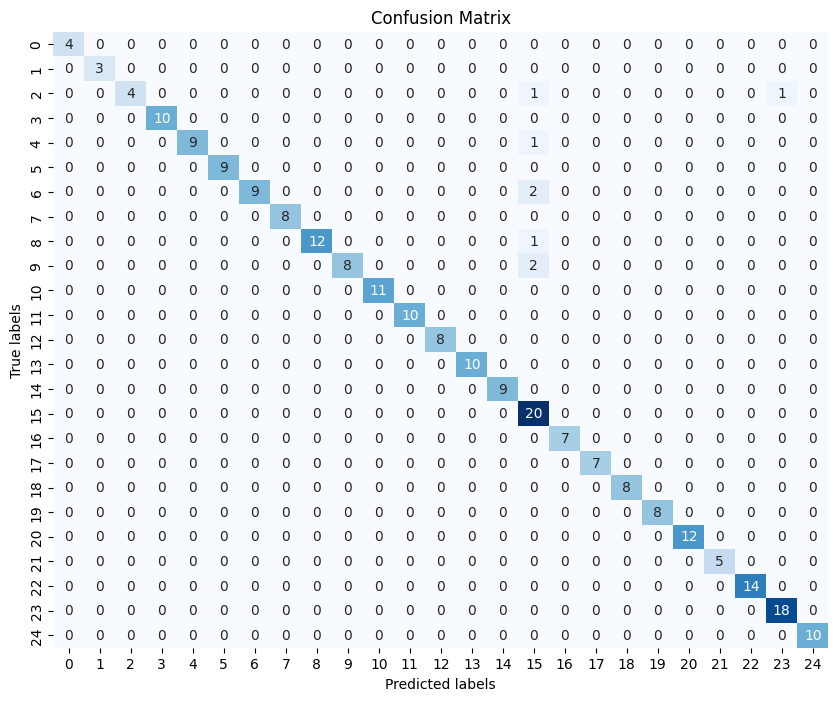

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an instance of the Naive Bayes classifier (Multinomial Naive Bayes is commonly used for text classification)
nb_model = MultinomialNB()

# Wrap the Naive Bayes classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(nb_model)

# Train the model on the training data
model.fit(x_train, y_train)

# Predict labels for the test set
y_pred = model.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predicting the Model on the Test Training:

In [30]:
prediction = model.predict(x_test)

## Finding Training and Testing Score:

In [31]:
print("training score : {:.8f}".format(model.score(x_train, y_train)))
print("testing score : {:.8f}".format(model.score(x_test, y_test)))

training score : 0.98751734
testing score : 0.96680498


/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/li

## Finding the Performance measures:

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP) from the confusion matrix
tn = cm[0, 0]
fp = cm[0, 1:].sum()
fn = cm[1:, 0].sum()
tp = cm[1:, 1:].sum()

# Calculate Specificity, G1-measure, and False Positive Rate (FPR)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
g1_measure = 2 * ((precision * recall) / (precision + recall))
fpr = fp / (fp + tn)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Specificity:", specificity)
print("G1-measure:", g1_measure)
print("False Positive Rate (FPR):", fpr)

Accuracy: 0.966804979253112
Precision: 1.0
Recall: 1.0
F1-score: 0.9671259884177319
Specificity: 1.0
G1-measure: 1.0
False Positive Rate (FPR): 0.0


## Showing the Performance measures in the graph:

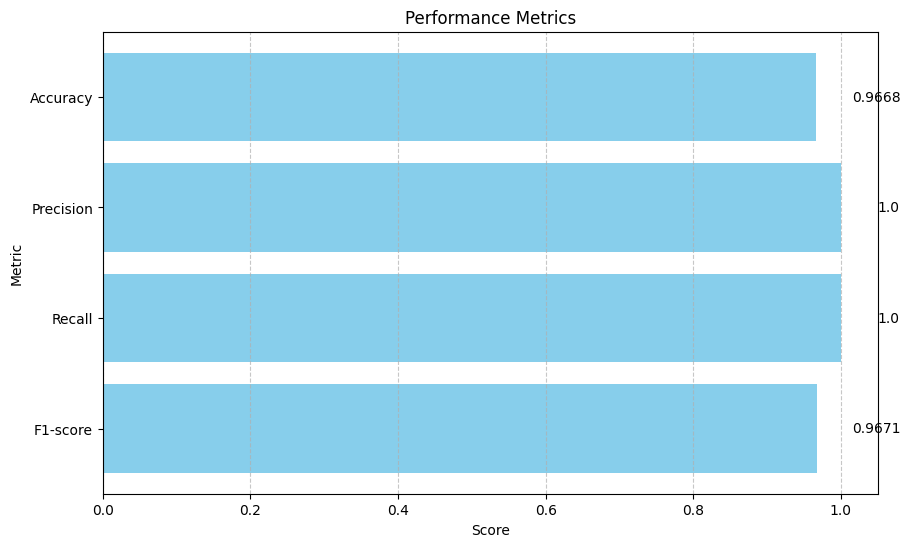

Performance Metrics:
      Metric     Score
0   Accuracy  0.966805
1  Precision  1.000000
2     Recall  1.000000
3   F1-score  0.967126


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to store performance metrics
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                           'Score': [accuracy, precision, recall, f1]})

# Plot performance metrics as a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(metrics_df['Metric'], metrics_df['Score'], color='skyblue')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_width() * 1.05, bar.get_y() + bar.get_height()/2, round(bar.get_width(), 4), va='center')

plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('Performance Metrics')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()

# Print performance metrics as a table
print("Performance Metrics:")
print(metrics_df)


# SVM

# Model Training:

In [34]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Create an instance of the Support Vector Machine classifier
svm_model = SVC()

# Wrap the SVM classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(svm_model)

# Train the model on the training data
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC())

# Finding the Cross validation measures:

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from scipy.sparse import csr_matrix

# Convert sparse data to dense numpy array
if isinstance(x_train, csr_matrix):
    x_train = x_train.toarray()

# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear')

# Wrap the SVM classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(svm_classifier)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())


Cross-validation scores: [1.         0.99305556 0.99305556 0.99305556 0.99305556]
Mean CV score: 0.9944444444444445
Standard deviation of CV scores: 0.002777777777777768


# Making Predictions on the test data:

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from scipy.sparse import csr_matrix

# Create an instance of the SVM classifier
svm_classifier = SVC(kernel='linear')

# Wrap the SVM classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(svm_classifier)

# Convert sparse data to dense numpy array if needed
if isinstance(x_train, csr_matrix):
    x_train = x_train.toarray()

if isinstance(x_test, csr_matrix):  # Convert x_test to dense array if it's sparse
    x_test = x_test.toarray()

# Fit the model to the training data
model.fit(x_train, y_train)

# Now the model is fitted, you can make predictions
predictions = model.predict(x_test)

# Finding Training and testing score:

In [37]:
# Training score
training_score = model.score(x_train, y_train)
print("Training Score:", training_score)

# Testing score
testing_score = model.score(x_test, y_test)
print("Testing Score:", testing_score)

Training Score: 1.0
Testing Score: 0.991701244813278


# Finding the performance measures:

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP) from the confusion matrix
tn = cm[0, 0]
fp = cm[0, 1:].sum()
fn = cm[1:, 0].sum()
tp = cm[1:, 1:].sum()

# Calculate Specificity, G1-measure, and False Positive Rate (FPR)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
g1_measure = 2 * ((precision * recall) / (precision + recall))
fpr = fp / (fp + tn)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Specificity:", specificity)
print("G1-measure:", g1_measure)
print("False Positive Rate (FPR):", fpr)

Accuracy: 0.966804979253112
Precision: 1.0
Recall: 1.0
F1-score: 0.9671259884177319
Specificity: 1.0
G1-measure: 1.0
False Positive Rate (FPR): 0.0


# Logistic Regression:

## Training the Model:

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Create an instance of the Logistic Regression classifier
logistic_model = LogisticRegression()

# Wrap the Logistic Regression classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(logistic_model)

# Train the model on the training data
model.fit(x_train, y_train)

/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm

OneVsRestClassifier(estimator=LogisticRegression())

# Finding the Cross Validation Measures:

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.sparse import csr_matrix


# Convert sparse data to dense numpy array
if isinstance(x_train, csr_matrix):
    x_train = x_train.toarray()

# Create an instance of the Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Wrap the Logistic Regression classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(logistic_classifier)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())


/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm

Cross-validation scores: [1.         0.98611111 0.99305556 0.98611111 0.98611111]
Mean CV score: 0.9902777777777778
Standard deviation of CV scores: 0.005555555555555536


/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm

## Making the predictions on the test data:

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from scipy.sparse import csr_matrix

# Convert sparse data to dense numpy array
if isinstance(x_train, csr_matrix):
    x_train = x_train.toarray()

if isinstance(x_test, csr_matrix):
    x_test = x_test.toarray()

# Create an instance of the Logistic Regression classifier
logistic_classifier = LogisticRegression()

# Wrap the Logistic Regression classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(logistic_classifier)

# Fit the model to the training data
model.fit(x_train, y_train)

# Now the model is fitted, you can make predictions
predictions = model.predict(x_test)

/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm

## Finding the Training and testing Score:

In [42]:
# Training score
training_score = model.score(x_train, y_train)
print("Training Score:", training_score)

# Testing score
testing_score = model.score(x_test, y_test)
print("Testing Score:", testing_score)

/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/li

Training Score: 0.9986130374479889
Testing Score: 0.9875518672199171


## Finding the performance measures:

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP) from the confusion matrix
tn = cm[0, 0]
fp = cm[0, 1:].sum()
fn = cm[1:, 0].sum()
tp = cm[1:, 1:].sum()

# Calculate Specificity, G1-measure, and False Positive Rate (FPR)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
g1_measure = 2 * ((precision * recall) / (precision + recall))
fpr = fp / (fp + tn)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Specificity:", specificity)
print("G1-measure:", g1_measure)
print("False Positive Rate (FPR):", fpr)

Accuracy: 0.966804979253112
Precision: 1.0
Recall: 1.0
F1-score: 0.9671259884177319
Specificity: 1.0
G1-measure: 1.0
False Positive Rate (FPR): 0.0


# Random Forest

## Training the model:

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Create an instance of the Random Forest classifier
rf_model = RandomForestClassifier()

# Wrap the Random Forest classifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(rf_model)

# Train the model on the training data
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

## Finding cross Validation measures:

In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Wrap the RandomForestClassifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(rf_classifier)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [1.         0.98611111 0.99305556 0.99305556 0.99305556]
Mean CV score: 0.9930555555555556
Standard deviation of CV scores: 0.0043920523057894


## Showing the Confusion Matrix:

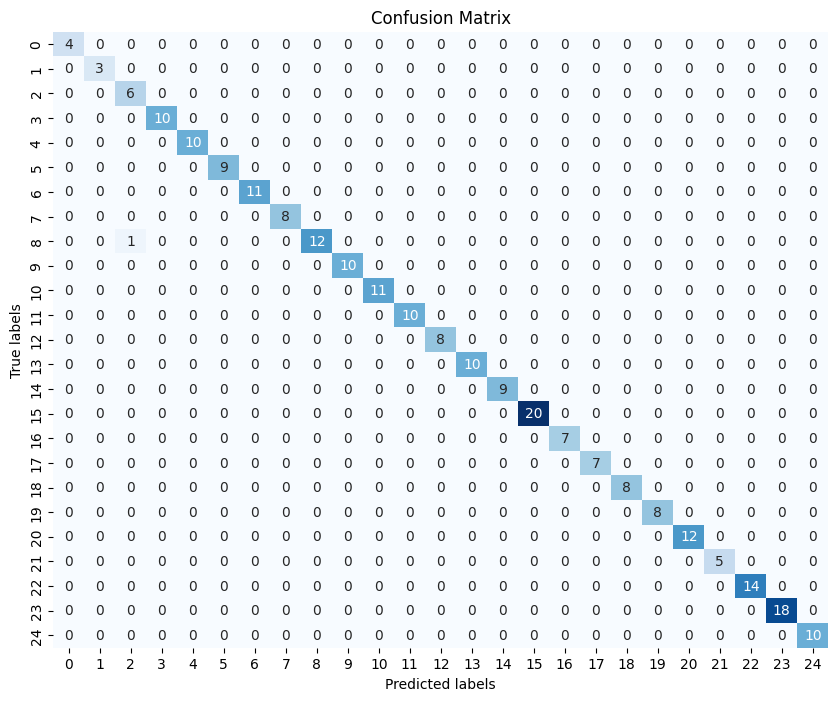

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Create an instance of the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Wrap the RandomForestClassifier in a OneVsRestClassifier if you have multiple classes
model = OneVsRestClassifier(rf_classifier)

# Train the model
model.fit(x_train, y_train)

# Predict labels for the test set
y_pred = model.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Predicting the model on the test data:

In [47]:
prediction = model.predict(x_test)

## Finding the test and training data:

In [48]:
# Training score
training_score = model.score(x_train, y_train)
print("Training Score:", training_score)

# Testing score
testing_score = model.score(x_test, y_test)
print("Testing Score:", testing_score)

Training Score: 1.0
Testing Score: 0.995850622406639


## Finding the performance measures:

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Negative (TN), False Positive (FP), False Negative (FN), True Positive (TP) from the confusion matrix
tn = cm[0, 0]
fp = cm[0, 1:].sum()
fn = cm[1:, 0].sum()
tp = cm[1:, 1:].sum()

# Calculate Specificity, G1-measure, and False Positive Rate (FPR)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
g1_measure = 2 * ((precision * recall) / (precision + recall))
fpr = fp / (fp + tn)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Specificity:", specificity)
print("G1-measure:", g1_measure)
print("False Positive Rate (FPR):", fpr)

Accuracy: 0.995850622406639
Precision: 1.0
Recall: 1.0
F1-score: 0.9959272263006703
Specificity: 1.0
G1-measure: 1.0
False Positive Rate (FPR): 0.0


## Showing the performance measures in the form of graph:

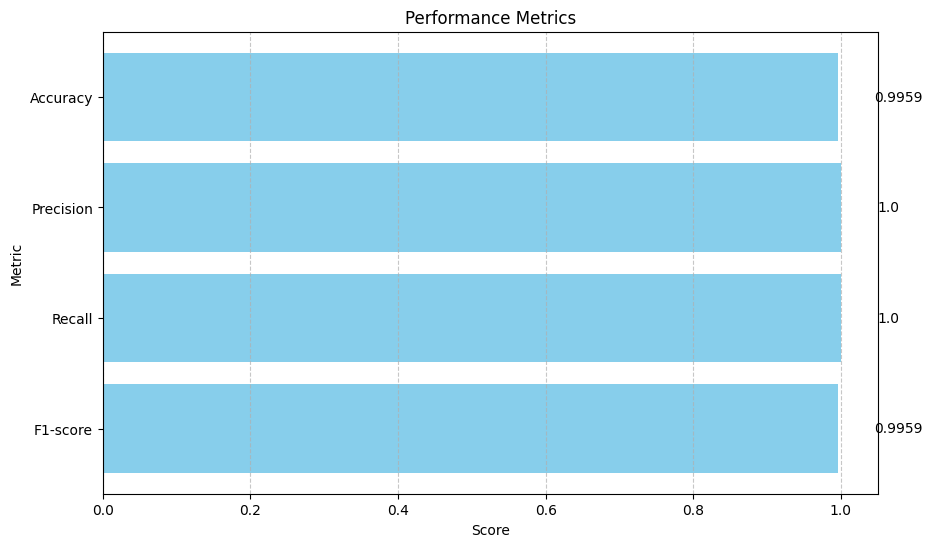

Performance Metrics:
      Metric     Score
0   Accuracy  0.995851
1  Precision  1.000000
2     Recall  1.000000
3   F1-score  0.995927


In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you already have accuracy, precision, recall, and f1 scores available

# Create a DataFrame to store performance metrics
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
                           'Score': [accuracy, precision, recall, f1]})

# Plot performance metrics as a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(metrics_df['Metric'], metrics_df['Score'], color='skyblue')

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_width() * 1.05, bar.get_y() + bar.get_height()/2, round(bar.get_width(), 4), va='center')

plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('Performance Metrics')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the highest score on top
plt.show()

# Print performance metrics as a table
print("Performance Metrics:")
print(metrics_df)

In [51]:
# Save all trained models for later use in a FASTAPI app
import joblib

# Save KNN model
joblib.dump(OneVsRestClassifier(KNeighborsClassifier()).fit(x_train, y_train), "knn_model.joblib")

# Save Naive Bayes model (MultinomialNB)
joblib.dump(OneVsRestClassifier(MultinomialNB()).fit(x_train, y_train), "naive_bayes_model.joblib")

# Save SVM model (linear kernel)
joblib.dump(OneVsRestClassifier(SVC(kernel='linear')).fit(x_train, y_train), "svm_model.joblib")

# Save Logistic Regression model
joblib.dump(OneVsRestClassifier(LogisticRegression()).fit(x_train, y_train), "logistic_regression_model.joblib")

# Save Random Forest model
joblib.dump(OneVsRestClassifier(RandomForestClassifier()).fit(x_train, y_train), "random_forest_model.joblib")

# Save the TfidfVectorizer for preprocessing in the API
joblib.dump(vect, "tfidf_vectorizer.joblib")

/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/komalkalaptop/Library/Python/3.9/li

['tfidf_vectorizer.joblib']